# Basic usage of KCF-convoy

- As a basic import, import the following things

In [1]:
from IPython.display import Image
%matplotlib inline
import kcfconvoy as kcf

## Basic class
- Basic classes include the following
    - KCFvec (KCF vector)
    - KCFmat (KCF matrix)

### KCFvec (KCF vector)
- There are the following as input form
    - KEGG ID https://www.kegg.jp
    - KNApSAcK ID http://kanaya.naist.jp/KNApSAcK/
    - Molfile
    - InChI
    - RDKmol
- As the class method, the following correspond to each other
    - `input_from_kegg(cid, cpd_name=str)`
        - Download from KEGG_ID in mol format and save it as `./Kegg/cid.mol`
    - `input_from_knapsack(cid, cpd_name=str)`
        - Download from knapsack_ID in mol format and save it as `./knapsack/cid.mol`
    - `input_molfile(molfile, cpd_name=str)`
        - It accepts the path of molfile, not the entity of molfile.
    - `input_inchi(inchi, cpd_name=str)`
    - `input_smiles(smiles, cpd_name=str)`
    - `input_rdkmol(rdkmol, cpd_name=str)`

In [2]:
kcfvec_1 = kcf.KCFvec()
kcfvec_1.input_from_kegg('C00002', "ATP")
kcfvec_2 = kcf.KCFvec()
kcfvec_2.input_from_kegg('C00003', "NAD+")
kcfvec_3 = kcf.KCFvec()
kcfvec_3.input_from_knapsack('C00002657')
kcfvec_4 = kcf.KCFvec()
kcfvec_4.input_smiles('Cc1ccccc1')

True

- The instance variables of KCFvec are listed below
    - `n_atoms`
        - Number of atoms in a compound
    - `n_bonds`
        - Number of edges in a compound
    - `mol`
        - RDKmol generated by RDKit
    - `cpd_name`
        - Name of compound
    - `kegg_atom_label`
        - The labels for KCF generated from RDKmol
    - `molblock_atoms`
        - The atom blocks in the Molfile format
    - `molblock_bonds`
        - The bond blocks in the Molfile format
    - `kcf_vec`
        - KCF Vector
    - `ring_string`
        - The strings that represent the ring substructures and their atom IDs.
    - `subs_string`
        - The strings that represent the other substructures and their atom IDs.

In [3]:
print(kcfvec_1.n_atoms)
print(kcfvec_1.n_bonds)
print(kcfvec_1.mol)
print(kcfvec_1.cpd_name)
print(kcfvec_1.kegg_atom_label)
print(kcfvec_1.molblock_atoms)
print(kcfvec_1.molblock_bonds)

31
33
ATP
{0: {'atom_species': 'N', 'atom_class': 'N4', 'kegg_atom': 'N4y'}, 1: {'atom_species': 'C', 'atom_class': 'C8', 'kegg_atom': 'C8y'}, 2: {'atom_species': 'C', 'atom_class': 'C1', 'kegg_atom': 'C1y'}, 3: {'atom_species': 'C', 'atom_class': 'C8', 'kegg_atom': 'C8x'}, 4: {'atom_species': 'C', 'atom_class': 'C8', 'kegg_atom': 'C8y'}, 5: {'atom_species': 'N', 'atom_class': 'N5', 'kegg_atom': 'N5x'}, 6: {'atom_species': 'O', 'atom_class': 'O2', 'kegg_atom': 'O2x'}, 7: {'atom_species': 'C', 'atom_class': 'C1', 'kegg_atom': 'C1y'}, 8: {'atom_species': 'N', 'atom_class': 'N5', 'kegg_atom': 'N5x'}, 9: {'atom_species': 'C', 'atom_class': 'C8', 'kegg_atom': 'C8y'}, 10: {'atom_species': 'C', 'atom_class': 'C8', 'kegg_atom': 'C8x'}, 11: {'atom_species': 'C', 'atom_class': 'C1', 'kegg_atom': 'C1y'}, 12: {'atom_species': 'C', 'atom_class': 'C1', 'kegg_atom': 'C1y'}, 13: {'atom_species': 'O', 'atom_class': 'O1', 'kegg_atom': 'O1a'}, 14: {'atom_species': 'N', 'atom_class': 'N5', 'kegg_atom': 'N

- In order to generate KCF vectors, it is necessary to execute the following method
    - `convert_kcf_vec(levels=int_list, attributes=int_list)`
        - `levels`
            - the levels of the three-letter KEGG Atom types. e.g., "C1a" means a methyl carbon (i.e., an sp3 carbon that locates at the terminal). In this case, levels=[0] yields "C", levels=[0,1] yields "C1", and levels=[0,1,2] yields "C1a". See https://www.genome.jp/kegg/reaction/KCF.html for the list of KEGG Atome types. In default, levels is set to [0,1,2]
        - `attributes`
            - the attributes of the chemical substctures. e.g., 0: atom, 1: bond, 2: triplet, 3: vicinity, 4: ring, 5: other attributes of substructures. If the users want to use atom, bond and triplet, set attrbutes=[0,1,2]. In default, attributes is set to [0, 1, 2, 3, 4, 5]. See https://bmcsystbiol.biomedcentral.com/articles/10.1186/1752-0509-7-S6-S2 for more detail.

In [4]:
kcfvec_1.convert_kcf_vec()
kcfvec_2.convert_kcf_vec()
kcfvec_3.convert_kcf_vec()
kcfvec_4.convert_kcf_vec()

True

In [5]:
print(kcfvec_1.kcf) # output as a KCF format file

ENTRY       ATP                           Compound
ATOM        31   
            1   N4y N    29.4250  -14.6015
            2   C8y C    30.4825  -15.3378
            3   C1y C    28.1393  -15.0165
            4   C8x C    29.9040  -13.2050
            5   C8y C    31.7155  -14.4321
            6   N5x N    30.6227  -16.7578
            7   O2x O    26.9999  -14.1633
            8   C1y C    27.7071  -16.2669
            9   N5x N    31.3532  -13.2108
            10  C8y C    32.9718  -14.9814
            11  C8x C    31.9434  -17.3478
            12  C1y C    25.8897  -14.9580
            13  C1y C    26.3221  -16.2669
            14  O1a O    28.5133  -17.4063
            15  N5x N    33.1353  -16.4655
            16  N1a N    34.0819  -14.1575
            17  C1b C    24.5691  -14.5315
            18  O1a O    25.8780  -17.5874
            19  O2b O    23.5349  -15.4664
            20  P1b P    22.1325  -15.4664
            21  O2c O    20.7361  -15.4664
            22  O1c O    22.

In [6]:
print(kcfvec_1.ring_string) #  The strings that represent the ring substructures and their atom IDs.

[{'0,1,3,4,8': 'C-C-N-C-N,1-5', '0,1,3,4,5,8,9,10,14': 'C-C-N-C-N-C-N-C-N,1-6,1-9', '1,4,5,9,10,14': 'C-C-C-N-C-N,1-6', '2,6,7,11,12': 'C-C-C-C-O,1-5'}, {'0,1,3,4,8': 'C8-C8-N4-C8-N5,1-5', '0,1,3,4,5,8,9,10,14': 'C8-C8-N5-C8-N4-C8-N5-C8-N5,1-9,2-6', '1,4,5,9,10,14': 'C8-C8-C8-N5-C8-N5,1-6', '2,6,7,11,12': 'C1-C1-C1-C1-O2,1-5'}, {'0,1,3,4,8': 'C8x-N4y-C8y-C8y-N5x,1-5', '0,1,3,4,5,8,9,10,14': 'C8x-N4y-C8y-N5x-C8x-N5x-C8y-C8y-N5x,1-9,3-8', '1,4,5,9,10,14': 'C8x-N5x-C8y-C8y-C8y-N5x,1-6', '2,6,7,11,12': 'C1y-C1y-C1y-C1y-O2x,1-5'}]


In [7]:
print(kcfvec_1.subs_string) #  The strings that represent the other substructures and their atom IDs.

[{'1,4,9': 'C-C-C', '1,4': 'C-C', '4,9': 'C-C', '2,7,11,12,16': 'C-C-C-C-C', '2,7,11,12': 'C-C-C-C', '2,7,12': 'C-C-C', '2,7': 'C-C', '7,11,12,16': 'C-C-C-C', '7,11,12': 'C-C-C', '7,12': 'C-C', '11,12': 'C-C', '11,16': 'C-C', '11,12,16': 'C-C-C', '18,19,20,23,24,27,28': 'O-P-O-P-O-P-O', '18,19,20,23,24,27,29': 'O-P-O-P-O-P-O', '18,19,20,23,24,27,30': 'O-P-O-P-O-P-O', '18,19,20,23,24,27': 'O-P-O-P-O-P', '18,19,20,23,24': 'O-P-O-P-O', '18,19,20,23,25': 'O-P-O-P-O', '18,19,20,23,26': 'O-P-O-P-O', '18,19,20,23': 'O-P-O-P', '18,19,20': 'O-P-O', '18,19,21': 'O-P-O', '18,19,22': 'O-P-O', '18,19': 'O-P', '18,19,20,21,22,23,24,25,26,27,28,29,30': 'O-P-O-P-O,4-O,4-O,2-O-P-O,9-O,9-O,2-O', '19,20,23,24,27,28': 'O-P-O-P-O-P', '19,20,23,24,27,29': 'O-P-O-P-O-P', '19,20,23,24,27,30': 'O-P-O-P-O-P', '19,20,23,24,27': 'P-O-P-O-P', '19,20,23,24': 'O-P-O-P', '19,20,23,25': 'O-P-O-P', '19,20,23,26': 'O-P-O-P', '19,20,23': 'P-O-P', '19,20': 'O-P', '19,20,23,24,25,26,27,28,29,30': 'O-P-O-P-O-P,4-O,4-O,2-O,2

## Depiction
- As a method for drawing, there are the following:
    - `draw_cpd(image_file=file_name)`
        - Drawing of compounds
        - Save it in the execution directory with the name of image_file
    - `draw_cpd_with_labels(start=0, custom_label=dict)`
        - Drawing of labeled compounds

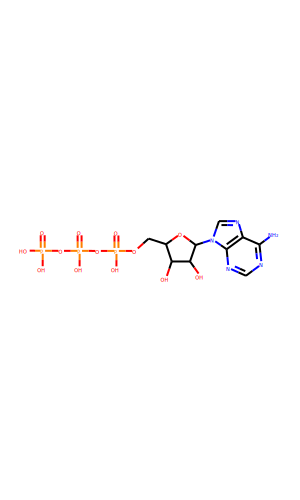

In [8]:
kcfvec_1.draw_cpd(image_file="mol_1.svg")

{0: 'N4y', 1: 'C8y', 2: 'C1y', 3: 'C8x', 4: 'C8y', 5: 'N5x', 6: 'O2x', 7: 'C1y', 8: 'N5x', 9: 'C8y', 10: 'C8x', 11: 'C1y', 12: 'C1y', 13: 'O1a', 14: 'N5x', 15: 'N1a', 16: 'C1b', 17: 'O1a', 18: 'O2b', 19: 'P1b', 20: 'O2c', 21: 'O1c', 22: 'O1c', 23: 'P1b', 24: 'O2c', 25: 'O1c', 26: 'O1c', 27: 'P1b', 28: 'O1c', 29: 'O1c', 30: 'O1c'}


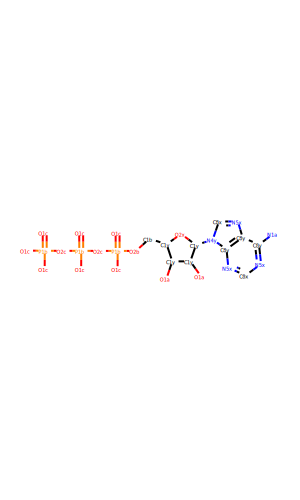

In [9]:
atom_label = {key: value["kegg_atom"] for key, value in kcfvec_1.kegg_atom_label.items()}
print(atom_label) # KEGG Atom types for each atoms
kcfvec_1.draw_cpd_with_labels(custom_label=atom_label)

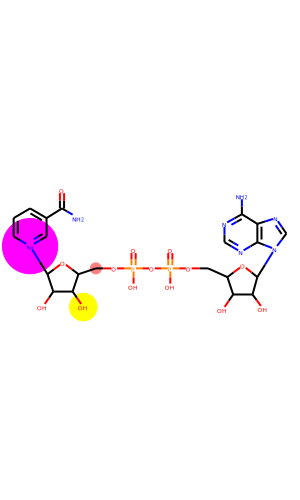

In [41]:
atoms = [6, 7, 8]
colors = {6: (1,1,0), 8: (1,0,1)}
radius = {6: 1.0, 8: 2.0}
kcfvec_2.draw_cpd(image_file="mol_2.svg", highlightAtoms=atoms, highlightAtomColors=colors, highlightAtomRadii=radius)

{0: 'C1y', 1: 'C1y', 2: 'C1y', 3: 'O2x', 4: 'C1y', 5: 'O1a', 6: 'O1a', 7: 'C1b', 8: 'N5y', 9: 'O2b', 10: 'P1b', 11: 'O2c', 12: 'P1b', 13: 'O2b', 14: 'O1c', 15: 'O1c', 16: 'O1c', 17: 'O1c', 18: 'C8x', 19: 'C8y', 20: 'C8x', 21: 'C8x', 22: 'C8x', 23: 'C5a', 24: 'N1a', 25: 'O5a', 26: 'C1y', 27: 'C1y', 28: 'C1y', 29: 'C1y', 30: 'O2x', 31: 'C1b', 32: 'N4y', 33: 'O1a', 34: 'O1a', 35: 'C8x', 36: 'N5x', 37: 'C8y', 38: 'C8y', 39: 'C8y', 40: 'N5x', 41: 'C8x', 42: 'N5x', 43: 'N1a'}


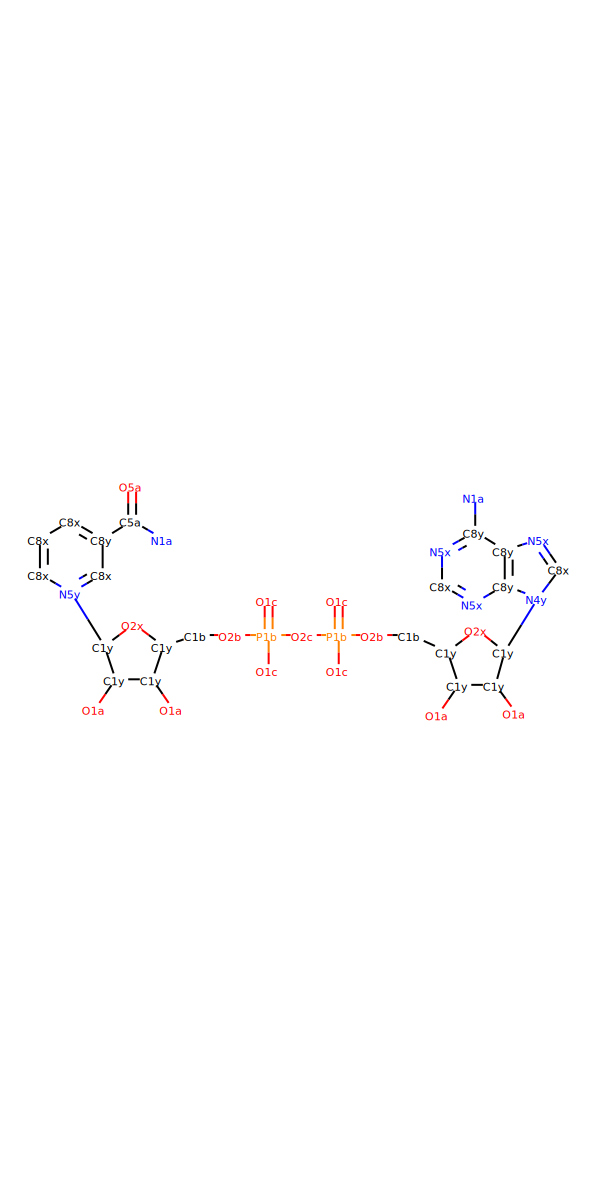

In [11]:
atom_label = {key: value["kegg_atom"] for key, value in kcfvec_2.kegg_atom_label.items()}
print(atom_label)
kcfvec_2.draw_cpd_with_labels(custom_label=atom_label, height=600, width=1200)

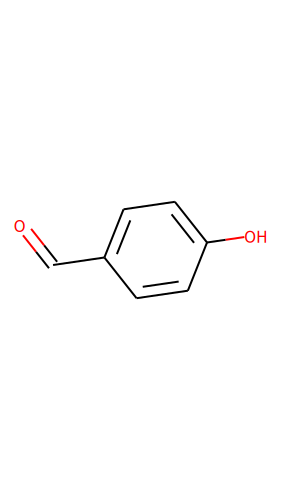

In [12]:
kcfvec_3.draw_cpd(image_file="mol_3.svg")

{0: 'C8x', 1: 'C8x', 2: 'C8y', 3: 'C8x', 4: 'C8x', 5: 'C8y', 6: 'C4a', 7: 'O1a', 8: 'O4a'}


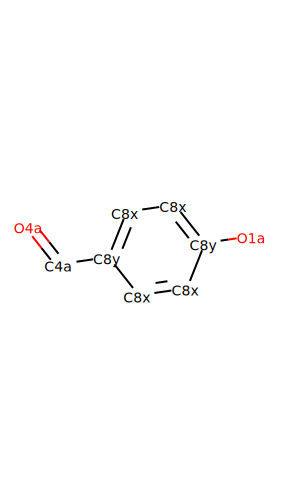

In [13]:
atom_label = {key: value["kegg_atom"] for key, value in kcfvec_3.kegg_atom_label.items()}
print(atom_label)
kcfvec_3.draw_cpd_with_labels(custom_label=atom_label)

## Other methods

- Other methods have the following
    - `find_seq(length, bidirectonal=bool)`
        - returns the list of atom IDs whose lengths equals or less than the defined length. "bidirectonal" determines if the molecular graph is dealt as a bidirectional graph or not.
    - `has_bond(atom_1, atom_2)`
        - True if atom_1 and atom_2 are connected. False otherwise.
    - `get_symbol(atom_index)`
        - returns the symbol of atomic element (e.g., "C" for a cabon atom) for the specified atom by atom_index
    - `get_triplets()`
        - returns the list of atom IDs that consists of triplet substructures
    - `get_vicinities()`
        - returns the list of atom IDs that consists of vicinity substructures
    - `get_pandas_df()`
        - returns the KCF vector as a Pandas Dataframe
    - `string2seq()`
        - returns a dictionary in which the keys are the substructure string and the values are the corresponding list of atom IDs.

In [14]:
#  find_seq(self, length, bidirectonal=True):
# the atom sting for which the length <= 5
subgraphs_5 = kcfvec_1.find_seq(5)
for subgraph in subgraphs_5:
    print(subgraph)

[0, 1, 0]
[0, 3, 8, 4, 1]
[0, 3, 8, 4, 1, 0]
[0, 2, 0]
[0, 1, 4, 8, 3]
[0, 1, 4, 8, 3, 0]
[0, 3, 0]
[0, 1, 4]
[0, 3, 8, 4]
[0, 1, 5]
[0, 2, 6]
[0, 2, 7]
[0, 1, 4, 8]
[0, 3, 8]
[0, 1, 4, 9]
[0, 3, 8, 4, 9]
[0, 1, 5, 10]
[0, 2, 6, 11]
[0, 2, 7, 12, 11]
[0, 2, 6, 11, 12]
[0, 2, 7, 12]
[0, 2, 7, 13]
[0, 1, 4, 9, 14]
[0, 1, 5, 10, 14]
[0, 1, 4, 9, 15]
[0, 2, 6, 11, 16]
[0, 2, 7, 12, 17]
[1, 0, 1]
[1, 4, 8, 3, 0]
[1, 4, 8, 3, 0, 1]
[1, 0, 2]
[1, 0, 3]
[1, 4, 8, 3]
[1, 0, 3, 8, 4]
[1, 0, 3, 8, 4, 1]
[1, 4, 1]
[1, 5, 10, 14, 9, 4, 1]
[1, 4, 9, 14, 10, 5, 1]
[1, 5, 1]
[1, 0, 2, 6]
[1, 0, 2, 7]
[1, 0, 3, 8]
[1, 4, 8]
[1, 4, 9]
[1, 5, 10, 14, 9]
[1, 4, 9, 14, 10]
[1, 5, 10]
[1, 0, 2, 6, 11]
[1, 0, 2, 7, 12]
[1, 0, 2, 7, 13]
[1, 4, 9, 14]
[1, 5, 10, 14]
[1, 4, 9, 15]
[2, 0, 2]
[2, 0, 1]
[2, 0, 3]
[2, 0, 1, 4]
[2, 0, 3, 8, 4]
[2, 0, 1, 5]
[2, 6, 2]
[2, 7, 12, 11, 6]
[2, 7, 12, 11, 6, 2]
[2, 6, 11, 12, 7]
[2, 6, 11, 12, 7, 2]
[2, 7, 2]
[2, 0, 1, 4, 8]
[2, 0, 3, 8]
[2, 0, 1, 4, 9]
[2, 0, 1, 5, 10]
[2

In [15]:
kcfvec_1.has_bond(0, 3)

True

In [16]:
kcfvec_1.has_bond(0, 4)

False

In [17]:
kcfvec_1.get_symbol(0)

'N'

In [18]:
triplets = kcfvec_1.get_triplets()
for triplet in triplets:
    print(triplet)

[0, 1, 0]
[0, 2, 0]
[0, 3, 0]
[0, 1, 4]
[0, 1, 5]
[0, 2, 6]
[0, 2, 7]
[0, 3, 8]
[1, 0, 1]
[1, 0, 2]
[1, 0, 3]
[1, 4, 1]
[1, 5, 1]
[1, 4, 8]
[1, 4, 9]
[1, 5, 10]
[2, 0, 2]
[2, 0, 1]
[2, 0, 3]
[2, 6, 2]
[2, 7, 2]
[2, 6, 11]
[2, 7, 12]
[2, 7, 13]
[3, 0, 3]
[3, 0, 1]
[3, 0, 2]
[3, 8, 4]
[3, 8, 3]
[4, 1, 0]
[4, 1, 4]
[4, 8, 3]
[4, 1, 5]
[4, 8, 4]
[4, 9, 4]
[4, 9, 14]
[4, 9, 15]
[5, 1, 0]
[5, 1, 5]
[5, 1, 4]
[5, 10, 5]
[5, 10, 14]
[6, 2, 0]
[6, 2, 6]
[6, 2, 7]
[6, 11, 6]
[6, 11, 12]
[6, 11, 16]
[7, 2, 0]
[7, 2, 7]
[7, 2, 6]
[7, 12, 11]
[7, 12, 7]
[7, 13, 7]
[7, 12, 17]
[8, 3, 0]
[8, 4, 1]
[8, 3, 8]
[8, 4, 8]
[8, 4, 9]
[9, 4, 1]
[9, 4, 9]
[9, 4, 8]
[9, 14, 10]
[9, 14, 9]
[9, 15, 9]
[10, 5, 1]
[10, 5, 10]
[10, 14, 9]
[10, 14, 10]
[11, 6, 2]
[11, 6, 11]
[11, 12, 7]
[11, 12, 11]
[11, 16, 11]
[11, 12, 17]
[11, 16, 18]
[12, 7, 2]
[12, 11, 6]
[12, 7, 12]
[12, 11, 12]
[12, 7, 13]
[12, 11, 16]
[12, 17, 12]
[13, 7, 2]
[13, 7, 13]
[13, 7, 12]
[14, 9, 4]
[14, 10, 5]
[14, 9, 14]
[14, 10, 14]
[14, 9, 15]


In [19]:
vicinities = kcfvec_1.get_vicinities()
for vicinity in vicinities:
    print(vicinity)

(0, [1, 2, 3])
(1, [0, 4, 5])
(2, [0, 6, 7])
(3, [0, 8])
(4, [1, 9, 8])
(5, [1, 10])
(6, [2, 11])
(7, [2, 12, 13])
(8, [3, 4])
(9, [4, 14, 15])
(10, [5, 14])
(11, [6, 16, 12])
(12, [7, 17, 11])
(13, [7])
(14, [9, 10])
(15, [9])
(16, [11, 18])
(17, [12])
(18, [16, 19])
(19, [18, 20, 21, 22])
(20, [19, 23])
(21, [19])
(22, [19])
(23, [20, 24, 25, 26])
(24, [23, 27])
(25, [23])
(26, [23])
(27, [24, 28, 29, 30])
(28, [27])
(29, [27])
(30, [27])


In [20]:
kcfvec_1.get_pandas_df()

,str,type,level,count
0,O-P-O,triplet,atom_species,48
1,C-N-C,triplet,atom_species,22
2,O1-P1-O2,triplet,atom_class,22
3,C-C-C,triplet,atom_species,20
4,N-C-N,triplet,atom_species,18
5,O-P-O-P-O,linear,atom_species,18
6,O1c-P1b-O2c,triplet,kegg_atom,18
7,O1-P1-O1,triplet,atom_class,17
8,O1c-P1b-O1c,triplet,kegg_atom,17
9,C-C-O,triplet,atom_species,16


In [21]:
kcfvec_1.string2seq()

{'C-C-C': ['1,4,9', '2,7,12', '7,11,12', '11,12,16'],
 'C-C': ['1,4', '4,9', '2,7', '7,12', '11,12', '11,16'],
 'C-C-C-C-C': ['2,7,11,12,16'],
 'C-C-C-C': ['2,7,11,12', '7,11,12,16'],
 'O-P-O-P-O-P-O': ['18,19,20,23,24,27,28',
  '18,19,20,23,24,27,29',
  '18,19,20,23,24,27,30',
  '19,20,21,23,24,27,28',
  '19,20,21,23,24,27,29',
  '19,20,21,23,24,27,30',
  '19,20,22,23,24,27,28',
  '19,20,22,23,24,27,29',
  '19,20,22,23,24,27,30'],
 'O-P-O-P-O-P': ['18,19,20,23,24,27',
  '19,20,23,24,27,28',
  '19,20,23,24,27,29',
  '19,20,23,24,27,30',
  '19,20,21,23,24,27',
  '19,20,22,23,24,27'],
 'O-P-O-P-O': ['18,19,20,23,24',
  '18,19,20,23,25',
  '18,19,20,23,26',
  '20,23,24,27,28',
  '20,23,24,27,29',
  '20,23,24,27,30',
  '19,20,21,23,24',
  '19,20,21,23,25',
  '19,20,21,23,26',
  '19,20,22,23,24',
  '19,20,22,23,25',
  '19,20,22,23,26',
  '23,24,25,27,28',
  '23,24,25,27,29',
  '23,24,25,27,30',
  '23,24,26,27,28',
  '23,24,26,27,29',
  '23,24,26,27,30'],
 'O-P-O-P': ['18,19,20,23',
  '19,20

### KCFmat (KCF matrix)
- A set of KCF vectors dealing with more than two compounds
- There are the following as input form
    - KEGG ID https://www.kegg.jp
    - KNApSAcK ID http://kanaya.naist.jp/KNApSAcK/
    - Molfile
    - InChI
    - RDKmol
- As the class method, the following correspond to each other
    - `input_from_kegg(cid, cpd_name=str)`
        - Download from KEGG_ID in mol format and save it as `./Kegg/cid.mol`
    - `input_from_knapsack(cid, cpd_name=str)`
        - Download from knapsack_ID in mol format and save it as `./knapsack/cid.mol`
    - `input_molfile(molfile, cpd_name=str)`
        - It accepts the path of molfile, not the entity of molfile.
    - `input_inchi(inchi, cpd_name=str)`
    - `input_smiles(smiles, cpd_name=str)`
    - `input_rdkmol(rdkmol, cpd_name=str)`

In [22]:
kcfmat = kcf.KCFmat()

In [23]:
kcfmat.input_from_kegg('C00002', "ATP")
kcfmat.input_from_kegg('C00003', "NAD+")

True

- When the users input the compounds into KCFmat, the following member variables are calculated automatically.
    - `inchis`
        - list of InChI strings for the compounds
    - `names`
        - list of names for the compounds 
    - `kcf_vecs`
        - list of KCF vectors for the compounds
    - `all_strs`
        - list of all the substructure strings within the KCF vector

In [24]:
print(kcfmat.inchis)

['InChI=1S/C10H16N5O13P3/c11-8-5-9(13-2-12-8)15(3-14-5)10-7(17)6(16)4(26-10)1-25-30(21,22)28-31(23,24)27-29(18,19)20/h2-4,6-7,10,16-17H,1H2,(H,21,22)(H,23,24)(H2,11,12,13)(H2,18,19,20)', 'InChI=1S/C21H27N7O14P2/c22-17-12-19(25-7-24-17)28(8-26-12)21-16(32)14(30)11(41-21)6-39-44(36,37)42-43(34,35)38-5-10-13(29)15(31)20(40-10)27-3-1-2-9(4-27)18(23)33/h1-4,7-8,10-11,13-16,20-21,29-32H,5-6H2,(H5-,22,23,24,25,33,34,35,36,37)/p+1']


In [25]:
print(kcfmat.names)

['ATP', 'NAD+']


In [26]:
print(kcfmat.kcf_vecs)

[<kcfconvoy.KCFvec.KCFvec object at 0x7f03491ab278>, <kcfconvoy.KCFvec.KCFvec object at 0x7f03491d5ef0>]


In [27]:
print(kcfmat.all_strs)

['C1-C1-C1-N5-C8-C8', 'C1-C1-C1-C1-O2-P1-O2-P1-O2-P1-O1', 'C1-O2-P1-O2-P1-O2-P1-O1,7-O1,7-O1,5-O1,5-O1,3-O1,3-O1', 'O-C-C-C-O-C-C-O-P-O-P', 'C1-C1-C1-C1-O2-P1-O1,6-O1,6-O2,3-O2-C1-N4-C8,12-C8,2-O1', 'C1b-C1y-O2x-C1y-N4y-C8y-C8y-C8y', 'C1-C1-C1-C1-N4-C8-C8-C8', 'C1-C1-O2-P1-O2-P1-O2-C1-C1-O2', 'C1-C1-C1-O2-C1-C1-O2-P1-O2-P1', 'N5y-C8x-C8y-C5a-O5a', 'O-C-C-C-O-C-C-O-P-O', 'C8-N5-C8-C8-N5-C8-N5-C8-N1', 'C-N-C-N-C-N-C-C-C-O', 'C1-C1-C1-O2-P1-O1', 'N-C-C-N-C-N-C-N-C-C-C-O', 'O-P-O-P-O', 'N1-C8-N5-C8-N5-C8-N4-C1-O2-C1-C1-O2', 'C8-N4-C1-C1,3-O2,2-C8-N5', 'C-C-C-C-N-C-N-C', 'C5-C8-C8-N5-C1-C1-O1', 'N5x-C8y-C8y-C8y,3-N5x,2-N1a', 'C1-C1-C1-C1-C1-O2-P1-O2', 'C1y-C1y-C1b-O2b-P1b', 'C-C-C-O-C-C-O-P-O-P-O', 'C8x-N5x-C8y-N4y-C1y-C1y-C1y-C1y-C1b-O2b', 'C5a-C8y-C8x-N5y-C1y-C1y-C1y-C1y-C1b-O2b-P1b', 'C1-C1-C1-C1-N4,4-O2,3-O1,2-O1', 'C-C-C-O-P,2-O-C-C,7-N', 'C8-C8-N4-C1-O2', 'C-N-C-C-C-C-C-O-P-O-P-O,11-O,11-O,3-O-6,9-O,9-O,2-C-C-C-C-C-N,22-O,4-O,5-O', 'O2-C1-C1-O2-C1-N5-C8-C8-C5-O5', 'C1-C1-O2-C1-C1-O2-P

- `calc_kcf_matrix(ratio=400)`
    - The users need to run this method in order to obtain the KCF matrix in the Numpy array format.
    - `all_mat` contains all substructures, which may contain the substructures found in only few compounds. len(`all_mat`) corresponds to the number of compounds.
    - `mat` contains limited substuctures for which the frequency (occurrence) values are more than len(`all_mat`) / `ratio` .
    - `mask_array` represents whether or not `mat` contains the substructure in `all_mat` .

In [28]:
kcfmat.calc_kcf_matrix()

True

In [29]:
print(kcfmat.all_mat)

[[0 3 1 ... 1 1 1]
 [2 0 0 ... 1 0 0]]


In [30]:
print(kcfmat.mask_array)

[False False False ...  True False False]


In [31]:
print(kcfmat.mat)

[[1 1 1 ... 1 1 1]
 [2 1 1 ... 1 2 1]]


### Similarity measures between two KCF vectors
`similarity` calculates similarity between two KCF vectors     
- similarity(kcf_vec_1, kcf_vec_2, n_nodes=list(range(100)), levels=[0, 1, 2])
    - kcf_vec_1, kcf_vec_2
        - KCF vectors of compounds 1 and 2, respectively.
    - `n_nodes`
        - specifies the size range of substructures by the numbers of nodes (atoms other than hydrogen atoms). In default, `n_nodes` is set to list(range(100)), meaning that the users consider the substructures ranging from 0 - 99 in size.
    - `levels`
         - the levels of the three-letter KEGG Atom types. e.g., "C1a" means a methyl carbon (i.e., an sp3 carbon that locates at the terminal). In this case, levels=[0] yields "C", levels=[0,1] yields "C1", and levels=[0,1,2] yields "C1a". See https://www.genome.jp/kegg/reaction/KCF.html for the list of KEGG Atome types. In default, `levels` is set to [0,1,2]
- The output consists of the following three numerals in a tuple:
    - The first numeral represents the weighted tanimoto similarity.
    - The second numeral represents the ratio of conserved substructures from compound 1 in compound 2.
    - The third numeral represents the ratio of conserved substructures from compound 2 in compound 1.

In [32]:
from kcfconvoy import similarity

In [33]:
similarity(kcfvec_1, kcfvec_2)

(0.49361139668086357, 0.8629011553273428, 0.5356175298804781)

In [34]:
kcfvec_1.kcf_vec.items()

dict_items([('N', {'n_nodes': 1, 'ele_type': 'atom', 'ele_level': 'atom_species', 'count': 5}), ('C', {'n_nodes': 1, 'ele_type': 'atom', 'ele_level': 'atom_species', 'count': 10}), ('O', {'n_nodes': 1, 'ele_type': 'atom', 'ele_level': 'atom_species', 'count': 13}), ('P', {'n_nodes': 1, 'ele_type': 'atom', 'ele_level': 'atom_species', 'count': 3}), ('C-N', {'n_nodes': 2, 'ele_type': 'bond', 'ele_level': 'atom_species', 'count': 10}), ('C-C', {'n_nodes': 2, 'ele_type': 'bond', 'ele_level': 'atom_species', 'count': 6}), ('C-O', {'n_nodes': 2, 'ele_type': 'bond', 'ele_level': 'atom_species', 'count': 5}), ('O-P', {'n_nodes': 2, 'ele_type': 'bond', 'ele_level': 'atom_species', 'count': 12}), ('N-C-N', {'n_nodes': 3, 'ele_type': 'triplet', 'ele_level': 'atom_species', 'count': 18}), ('C-C-N', {'n_nodes': 3, 'ele_type': 'triplet', 'ele_level': 'atom_species', 'count': 14}), ('N-C-O', {'n_nodes': 3, 'ele_type': 'triplet', 'ele_level': 'atom_species', 'count': 2}), ('C-N-C', {'n_nodes': 3, 'ele

## Calculating fingerprints implemented in RDKit

- The following fingerprints implemented in RDKit can also be calculated and incorporated easily into KCF matrix.
    - RDKFingerprint
    - PatternFingerprint
    - MorganFingerprint
    - LayeredFingerprint
    - PatternFingerprint
- By using `fingerprint` argument, the users can select the fingerprint. The calculated fingerprints are stored in `KCFmat.fps`

In [35]:
kcfmat.calc_fingerprints(fingerprint="MorganFingerprint")

True

In [36]:
print(kcfmat.fps)

[<rdkit.DataStructs.cDataStructs.ExplicitBitVect object at 0x7f03484db3f0>, <rdkit.DataStructs.cDataStructs.ExplicitBitVect object at 0x7f0348451ee0>]
